<h2> Họ tên: Nguyễn Phú Thành. MSSV: 18110014 </h2>
<h2> Bài tập thực hành Nhập môn máy học - Lab 07 </h2>

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

## 1. Hãy thử thay đổi Max_depth để tăng accuracy trên tập testing, vẽ cây với Max_depth đã thay đổi

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-07/bt1.csv', header = None)

In [3]:
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.tail()

,0,1,2,3,4,5,6
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names

In [6]:
X, y = data.drop(['class'], axis = 1), data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [7]:
enc = OrdinalEncoder().fit(X_train)
X_train = enc.transform(X_train)
X_test = enc.transform(X_test)

In [8]:
clf_gini = DecisionTreeClassifier(
    criterion = 'entropy', 
    max_depth = 7, 
    random_state = 0, 
    max_features = None
).fit(X_train, y_train) 

In [9]:
clf_gini.score(X_train, y_train)

0.9299913569576491

In [10]:
clf_gini.score(X_test, y_test)

0.9352014010507881

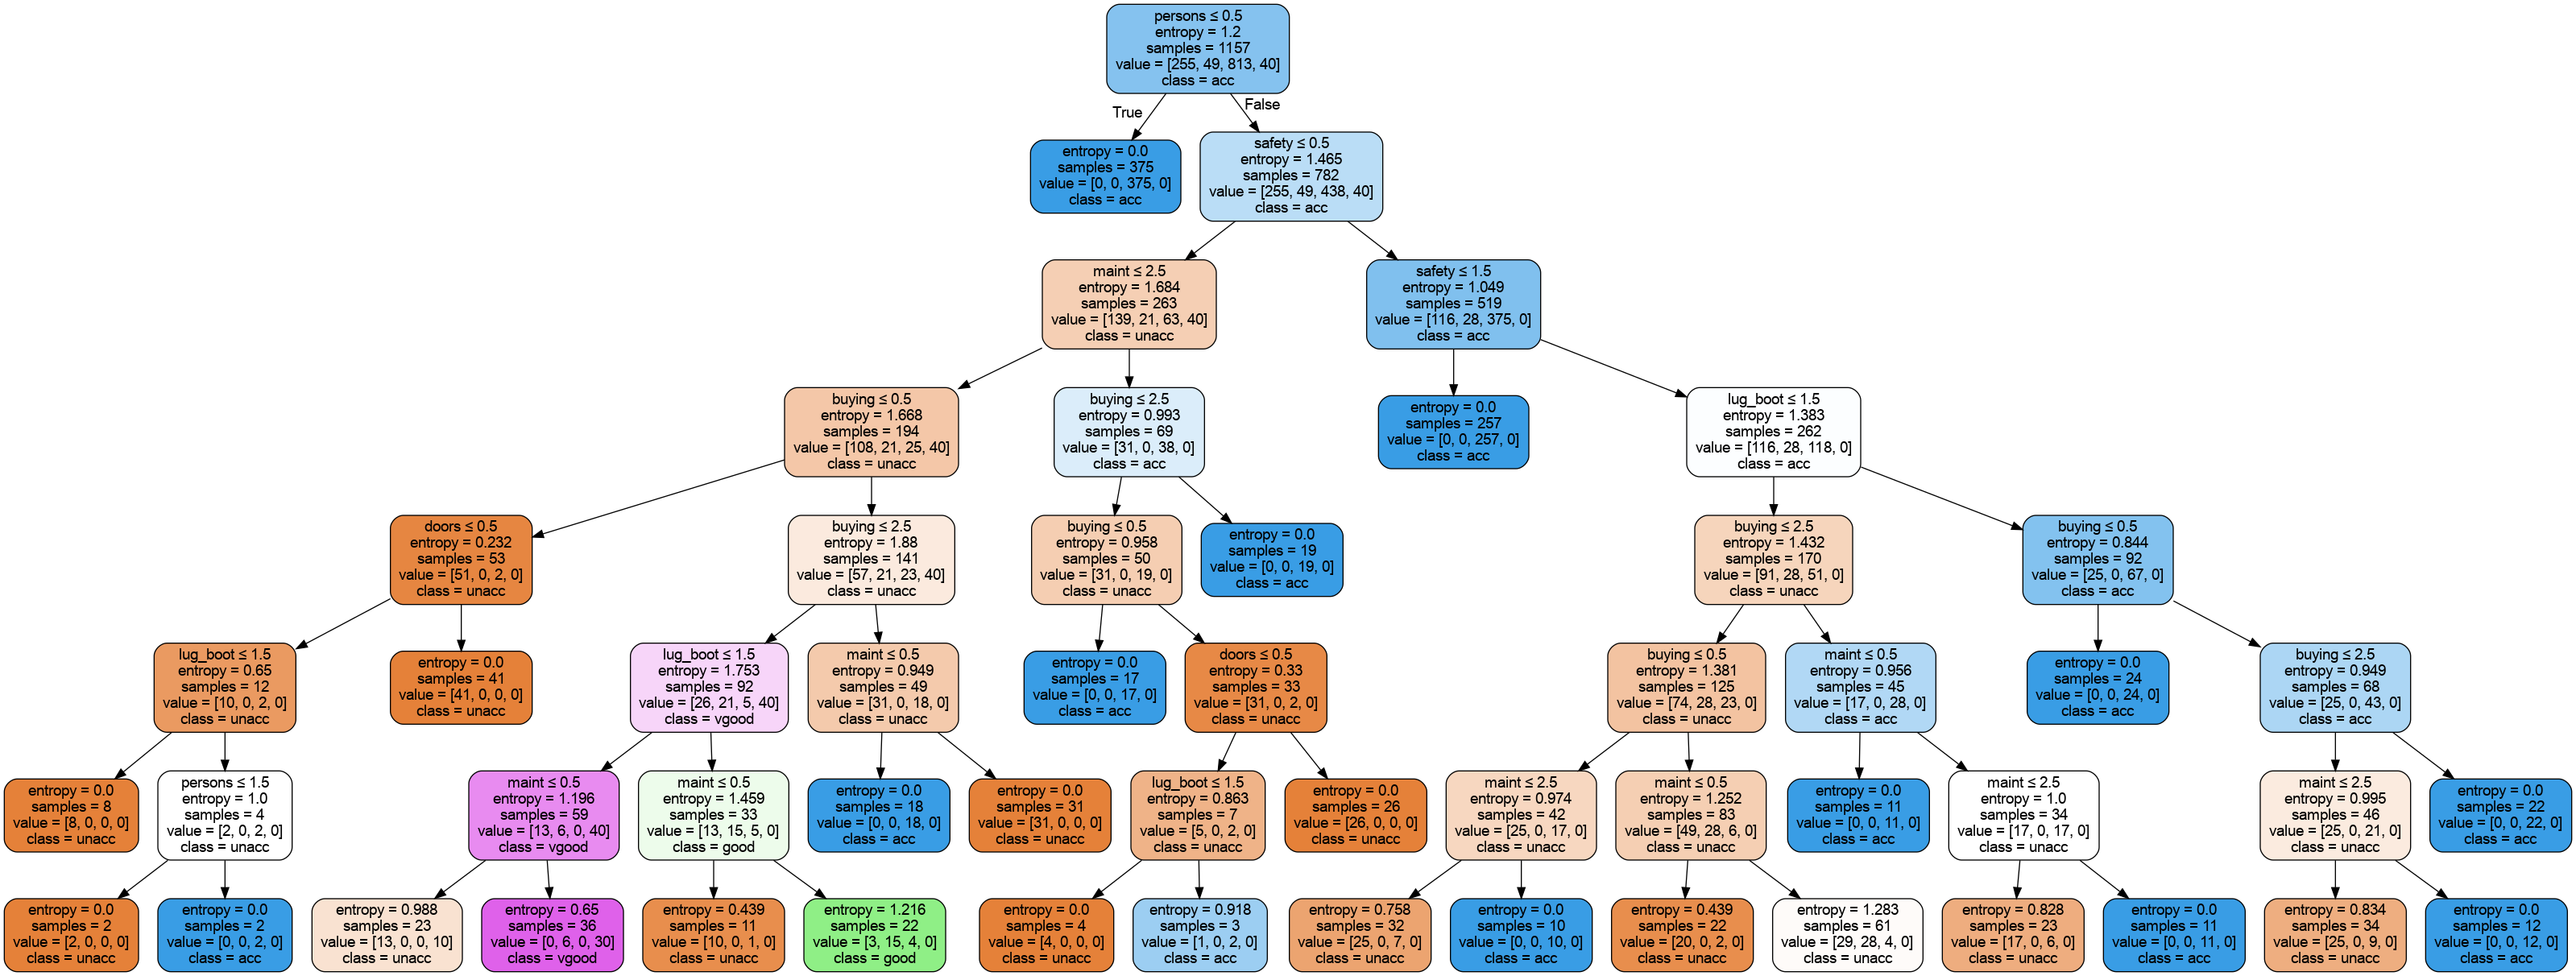

In [11]:
dot_data = StringIO()
export_graphviz(
    clf_gini, 
    out_file = dot_data,  
    filled = True, rounded = True,
    special_characters = True,
    feature_names = data.iloc[:, :-1].columns,
    class_names = list(y_train.unique())
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## 2. max_depth ảnh hưởng như thế nào đối với mô hình decision tree, vì sao?

<h2> Trả lời: </h2>
<h2> Sự ảnh hưởng của max_depth đối với mô hình decision tree: </h2>
<ul> 
    <li>
        <h3> Nếu max_depth quá nhỏ: </h3>
         <p> 
             Tính impurity ở từng node lá của decision tree cao, dẫn đến accuracy thấp trên tập train (underfit)
         </p> 
    </li>
    <li>
        <h3>Nếu max_depth quá cao: </h3>
        <p> 
            Tính impurity ở từng node lá của decison tree thấp, dẫn đến accuracy cao trên tập train, tuy nhiên
            vẫn có thể xảy ra trường hợp accuracy trên tập test lại thấp (overfit)
        </p>
    </li>
</ul>

## 3. Dùng dataset bên dưới, từ mô hình Decision Tree hãy code thêm mô hình Random Forest như thuật toán đã học. Thử tìm hiểu cách dùng Random Forest trong sklearn để so sánh kết quả.

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-07/bt2.csv')

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    data[data.columns.difference(['Outcome'])], 
    data['Outcome'], 
    test_size = 0.3, 
    random_state = 1
)

In [16]:
X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
y_train, y_test = y_train.to_numpy(), y_test.to_numpy() 

In [17]:
from collections import Counter
class RandomForestClassifier:
    def __init__(self, number_features, number_trees, random_state = 0):
        '''
            Initialize RandomForestClassifier object
            Parameters:
                number_features: int
                    Number of features to use for each decision tree
                number_trees: int
                    Number of trees in the forest
                random_state: int, default 0
                    Initialize random state to randomly choosing a subset of training data for each tree 
        '''
        self.rnd = np.random.RandomState(random_state)
        self.nb_features, self.nb_trees = number_features, number_trees
        self.trees = None
    
    def forestVoting_(self, votes):
        '''
            Make `a` prediction from the votes of every trees in the forest
            Parameters:
                votes: list-like object
                    Votes from each tree
            Returns:
                A prediction is made from votes, which is based on 'majority votes' scheme
                (A type that function returns depends on type of each element of training label y)
        '''
        count = Counter(votes)
        # Get item with major votes
        result, _ = count.most_common(1)[0]
        return result
    
    def fit(self, X, y, **kwargs):
        '''
            Fit a training set to classifier.
            Parameters:
                X: numpy.ndarray of shape (n_samples, n_features)
                    Training data
                y: numpy.ndarray of shape (n_samples,)
                    Training labels corresponding to each sample from training data
                kwargs: Keyword arguments to pass in each Decision Tree
                    List of keyword arguments can be found in scikitlearn Decision Tree's documentation
            Returns: RandomForestClassifier object
                RandomForestClassifier object after fitting it to the training set
        '''
        # A list of Decision Trees
        self.trees = []
        # A list of which features are use in each tree
        self.trees_features = []
        number_samples, number_features = X.shape[:2]
        for _ in range(self.nb_trees):
            # Random sampling with replacement for rows
            rows_index = self.rnd.choice(np.arange(0, number_samples), size = number_samples, replace = True)
            # Random sampling without replacement for cols (Choosing k features)
            cols_index = self.rnd.choice(np.arange(0, number_features), size = self.nb_features, replace = False)
            # Get subset
            subset_X, subset_y = (
                (X[rows_index.tolist(), :][:, cols_index.tolist()]).copy(), 
                y[rows_index.tolist()].copy()
            )
            tree = DecisionTreeClassifier(**kwargs).fit(subset_X, subset_y)
            self.trees.append(tree)
            self.trees_features.append(cols_index)
        return self
    
    def predict(self, X):
        '''
            Make predictions on dataset
            Paramters:
                X: numpy.ndarray of shape (n_samples, n_features)
                    Testing set
            Returns: numpy.ndarray of shape (n_samples,)
                Prediction from testing set
        '''
        assert self.trees is not None, 'Random Forest object must fit to the training set first before making prediction'
        
        voteSamples = []
        for i, tree in enumerate(self.trees):
            features = self.trees_features[i]
            vote = tree.predict(X[:, features])
            voteSamples.append(vote.reshape(-1, 1))
        # Each column of voteSamples is a prediction from each tree
        # Each row of voteSamples is different "votes" of each tree for corresponding sample
        voteSamples = np.hstack(voteSamples)
        y_predict = []
        
        for votes in voteSamples:
            predict_result = self.forestVoting_(votes)
            y_predict.append(predict_result)
        return np.array(y_predict)

In [18]:
clf = RandomForestClassifier(
    number_features = 5, number_trees = 1000
).fit(
    X_train, y_train, 
    criterion = 'entropy', max_depth = 10, 
    max_features = None, random_state = 0
)

In [19]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [20]:
(clf.predict(X_test) == y_test).sum()/y_test.shape[0]

0.7922077922077922

In [21]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [22]:
clf_sklearn = RFC(
    n_estimators = 1000, 
    criterion = 'entropy', 
    max_depth = 10, 
    max_features = None, 
    random_state = 0
).fit(X_train, y_train)

In [23]:
clf_sklearn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [24]:
(clf_sklearn.predict(X_test) == y_test).sum()/y_test.shape[0]

0.7922077922077922